# Gradio Demo / Exploration

In this notebook we'll explore the [gradio](https://gradio.app) library for setting up an inference endpoint for a model.

In [1]:
import pandas as pd

import gradio as gr

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
# load demo data
iris = load_iris()
X, y = iris['data'], iris['target']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

In [3]:
# train sample classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [4]:
# predict endpoint function
def pred(inp):
    return clf.predict(inp.values)

# gui
iface = gr.Interface(
    fn=pred, 
    inputs=gr.inputs.Dataframe(
        headers=iris['feature_names'],
        default=Xtest.tolist()[:5],
    ),
    outputs=[
        "numpy"
    ],
    description="Enter iris characteristics here:"
)
iface.launch()

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7860/', None)

## Results

Seems to work quite smoothly, was able to get it up and running in ~5min. Screenshots from locally deployed app:

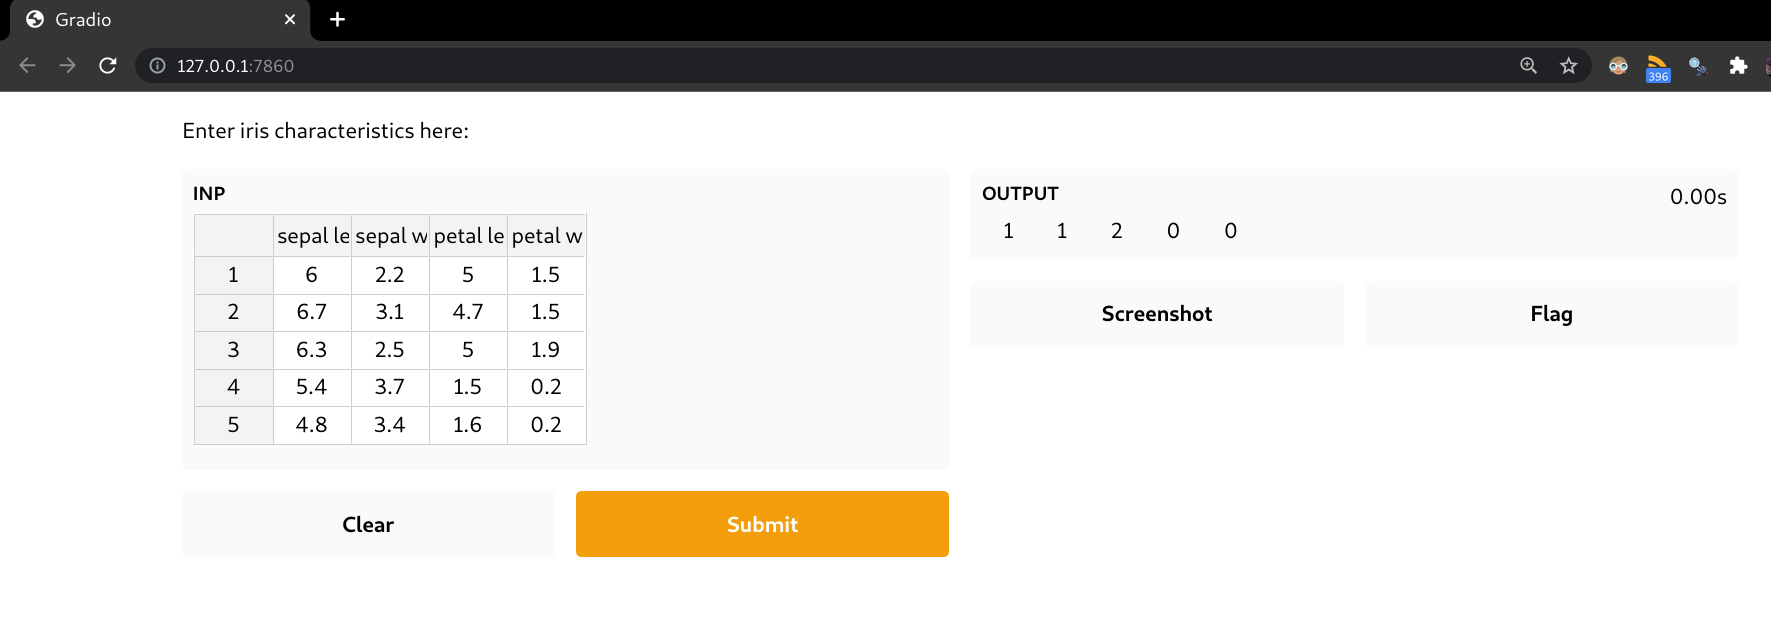

Modified the 3rd entry to be the same as 2nd entry to sanity check if the new prediction makes sense.

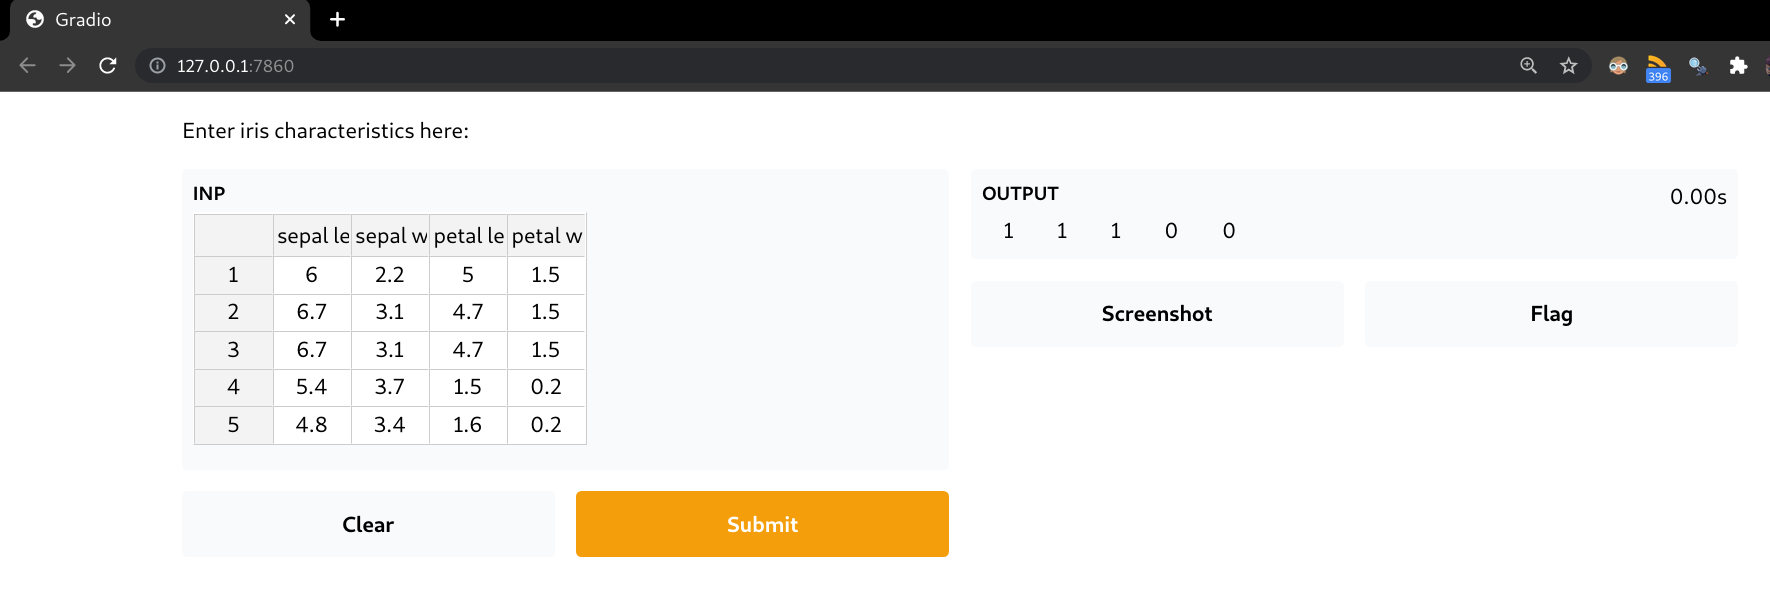